In [1]:
#!/usr/bin/env python3
############################
#
# template by M Joyce
# for use with Smith College students
#
############################

## import the modules
import numpy as np
import matplotlib.pyplot as plt
#import sys
import scipy
from scipy import stats
from scipy.stats import norm

print("modules imported")

modules imported


In [2]:
def set_fig(ax):
    ax.tick_params(axis = 'both',which='both', width=2)
    ax.tick_params(axis = 'both',which='major', length=12)
    ax.tick_params(axis = 'both',which='minor', length=8, color='black')
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    return 

print("plot settings function defined")

plot settings function defined


In [3]:
## load the data
data_file = 'stellar_ages.dat'
Joyce_ages= np.loadtxt(data_file, usecols=(0), unpack = True)

print("ages loaded")

ages successfully loaded


In [4]:
################################
# create a Gaussian, or normal distribution,
# fit to the stellar age data defined by
# [mu (the mean), sigma (1 standard deviation)]
#################################

(Jmu, Jsigma) = norm.fit(Joyce_ages)

## format a string to use as a plotting label
Jstats=r'$\mu=$' + "%.2f"%Jmu + ';'+r' $\sigma=$' + "%.2f"%Jsigma
print(Jstats)

$\mu=$10.83; $\sigma=$3.43


In [5]:
###############################
# create a histogram object that has
# an array of bin locations as an attribute 
###############################
histogram = np.histogram(Joyce_ages)
bins = histogram[1]
#print("bins", bins)

In [14]:
###############################
# create a normal distribution defined by
# [mu, sigma] 
# to be plotted against the bins
###############################
normalized_gaussian_pdf = scipy.stats.norm.pdf(bins, Jmu, Jsigma)

#multiply by the number of observations (91)
gaussian_pdf= normalized_gaussian_pdf*len(Joyce_ages)

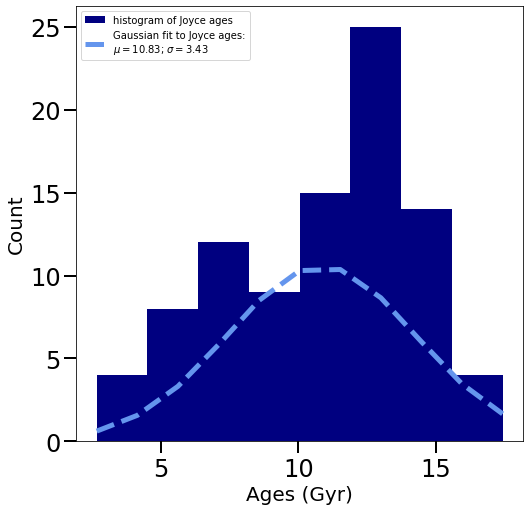

In [7]:
###############################
# plot our Gaussian vs the bins
# on top of the histogram
###############################
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

plt.hist(Joyce_ages,  bins="auto", color='navy', label='histogram of Joyce ages')
plt.plot(bins, gaussian_pdf, '--', color='cornflowerblue', linewidth=5,\
         label='Gaussian fit to Joyce ages:\n'+Jstats)

plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)
plt.show()
plt.close()

In [8]:
# create a uniform array of values spanning the stellar ages
# to serve as the x-values for the kde
age_x_values = np.linspace(min(Joyce_ages), max(Joyce_ages), 1000)

## create a kde model for the stellar ages instead of a normal distribution
kde_model = stats.gaussian_kde(Joyce_ages)
kde = kde_model(age_x_values)

## scale the kde by the number of stellar ages in our sample (91)
scaled_kde = kde*len(Joyce_ages)

print("cell complete")

cell complete


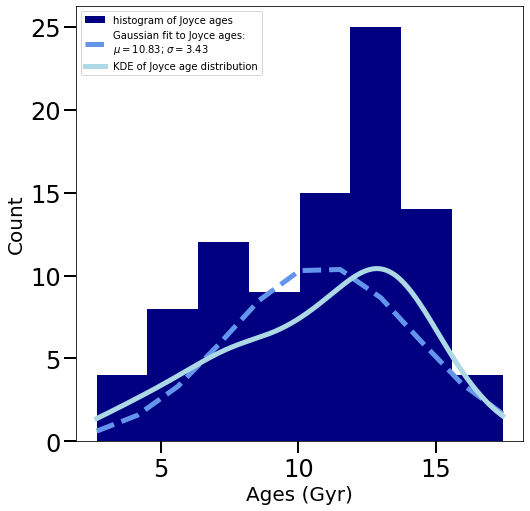

In [9]:
fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

## histogram from earlier
plt.hist(Joyce_ages,  bins="auto", color= 'navy', label='histogram of Joyce ages')

## Gaussian fit from earlier
plt.plot(bins, gaussian_pdf, '--', color='cornflowerblue', linewidth=5,\
         label='Gaussian fit to Joyce ages:\n'+Jstats) 

## NEW: add the KDE to the plot
plt.plot(age_x_values, scaled_kde, linewidth=5, linestyle='-', color='lightblue',\
         label='KDE of Joyce age distribution')

plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)
plt.show()
plt.close()

In [10]:
##################################
# EXERCISE 1
##################################
# Using the above as a template, compare a Gaussian 
# versus KDE fit to the "Bensby Ages" 
# in stellar_ages.dat
#
## hint: repeat steps 3, 4, 5, and 6 with new variable names
#
# Ex):
#
#    Bensby_ages = ...
#    (..., ...) = norm.fit(Bensby_ages)
#    Bstats= ...

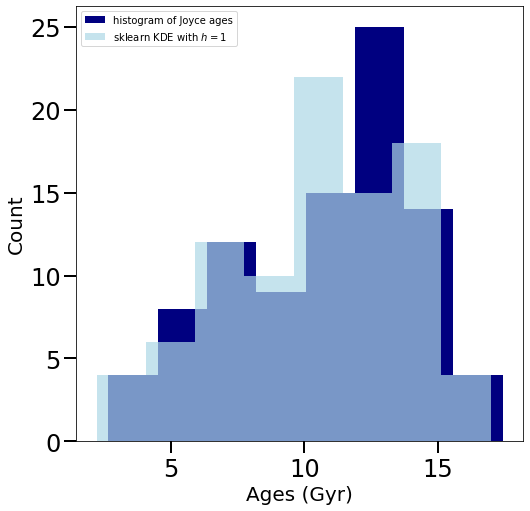

In [11]:
##################################
#
# Resampling the KDE: Generative Models
#
##################################
import sklearn
from sklearn.neighbors import KernelDensity

bandwidth_value = 1
number_of_bins = 8

kde1 = KernelDensity(bandwidth=bandwidth_value).fit(Joyce_ages.reshape(-1, 1))
kde_model_1 = kde1.sample(91)

fig, ax = plt.subplots(figsize = (8,8))
set_fig(ax)

## histogram from earlier
plt.hist(Joyce_ages,  bins="auto", color= 'navy', label='histogram of Joyce ages') 

## NEW: add our new KDE model with bandwidth h = 1
ax.hist(kde_model_1, bins=number_of_bins, density=False, color='lightblue', alpha=0.7,\
        label=r'sklearn KDE with $h=1$')

plt.xlabel('Ages (Gyr)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(loc=2)

plt.show()
plt.close()

In [12]:
##################################
# EXERCISE 2
##################################
# repeat the above, setting the bandwidth to 0.1 and then to 0.01
# plot all three kdes on top of each other
# which is the best fit to the Joyce Ages histogram?


In [13]:
##################################
# EXERCISE 3
##################################
# Make a sklearn KDE for Bensby's ages
# Visually, determine an appropriate value 
# for the bandwidth parameter in this case